In [34]:
#importing packages
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, itertools, pandas as pd, numpy as np

In [35]:
#loading dataset
cf10 = keras.datasets.cifar10
(train_X, train_Y), (test_X, test_Y) = cf10.load_data()

In [36]:
#splitting training data into train & validation set
#15% reserved for validation
train_X, val_X, train_Y, val_Y = train_test_split(
    train_X, train_Y, test_size=0.15, stratify=train_Y, random_state=10)

#displaying data shapes
print(f'Training Data - {train_X.shape}')
print(f'Validation Data - {val_X.shape}')
print(f'Test Data - {test_X.shape}')

Training Data - (42500, 32, 32, 3)
Validation Data - (7500, 32, 32, 3)
Test Data - (10000, 32, 32, 3)


In [37]:
#class labels
labels = {0:'Airplane',
         1:'Automobile',
         2:'Bird',
         3:'Cat',
         4:'Deer',
         5:'Dog',
         6:'Frog',
         7:'Horse',
         8:'Ship',
         9:'Truck'}

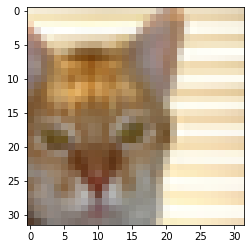

The label is - Cat


In [38]:
#displaying random sample
plt.figure()
plt.imshow(train_X[15])
plt.show()
print(f'The label is - {labels[train_Y[15][0]]}')

In [39]:
#creating network
#using InceptionV3 as base layer - Transfer learning

resnet = ResNet50(include_top=False, #loading model without classification layer
                    input_shape=(32,32,3)#same as shape for CIFAR dataset
                )

model = keras.Sequential([
    resnet,
    #layers.Flatten(),
    layers.GlobalAvgPool2D(),
    layers.Dense(units= 25, activation= 'relu'),
    layers.Dense(units=10), # same as num classes
    layers.Softmax() # to convert vector output to class probabilities
])


#compiling model
#we use SparseCategoricalCrossentropy as classes are in integers
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

#early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=15, min_delta=0.01, restore_best_weights=True)

In [40]:
#training model
history = model.fit(
    train_X, train_Y,
    validation_data=(val_X, val_Y),
    batch_size=150,
    epochs=100,
    callbacks = [early_stopping]
)

Train on 42500 samples, validate on 7500 samples
Epoch 1/100
42500/42500 [==============================] - 34s 795us/sample - loss: 2.0514 - accuracy: 0.4077 - val_loss: 2.1432 - val_accuracy: 0.3168
Epoch 2/100
42500/42500 [==============================] - 28s 665us/sample - loss: 2.0041 - accuracy: 0.4543 - val_loss: 2.2680 - val_accuracy: 0.1920
Epoch 3/100
42500/42500 [==============================] - 28s 669us/sample - loss: 1.9336 - accuracy: 0.5249 - val_loss: 2.1151 - val_accuracy: 0.3439
Epoch 4/100
42500/42500 [==============================] - 28s 668us/sample - loss: 1.8895 - accuracy: 0.5696 - val_loss: 1.9952 - val_accuracy: 0.4639
Epoch 5/100
42500/42500 [==============================] - 28s 666us/sample - loss: 1.8733 - accuracy: 0.5859 - val_loss: 2.1476 - val_accuracy: 0.3107
Epoch 6/100
42500/42500 [==============================] - 28s 668us/sample - loss: 1.8562 - accuracy: 0.6042 - val_loss: 2.2110 - val_accuracy: 0.2481
Epoch 7/100
42500/42500 [==============

42500/42500 [==============================] - 29s 672us/sample - loss: 1.6316 - accuracy: 0.8291 - val_loss: 1.8394 - val_accuracy: 0.6207
Epoch 55/100
42500/42500 [==============================] - 29s 673us/sample - loss: 1.6411 - accuracy: 0.8195 - val_loss: 1.7693 - val_accuracy: 0.6907
Epoch 56/100
42500/42500 [==============================] - 29s 673us/sample - loss: 1.6361 - accuracy: 0.8245 - val_loss: 1.7644 - val_accuracy: 0.6953
Epoch 57/100
42500/42500 [==============================] - 29s 672us/sample - loss: 1.6321 - accuracy: 0.8286 - val_loss: 1.7466 - val_accuracy: 0.7133
Epoch 58/100
42500/42500 [==============================] - 29s 674us/sample - loss: 1.6351 - accuracy: 0.8256 - val_loss: 1.7921 - val_accuracy: 0.6676


Minimum validation loss: 1.7239536142349243


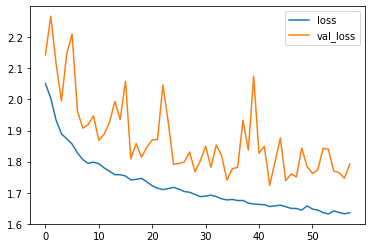

In [41]:
#learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

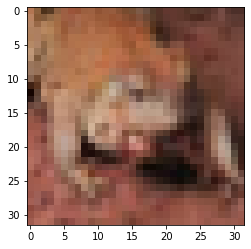

The label is - Frog
Model predicted - Frog


In [42]:
#predictions
preds = model.predict(test_X)

#checking random prediction
plt.figure()
plt.imshow(test_X[5])
plt.show()
print(f'The label is - {labels[test_Y[5][0]]}')
print(f'Model predicted - {labels[np.argmax(preds[5])]}')

In [43]:
#model performance
model.evaluate(test_X, test_Y,verbose=2)

10000/10000 - 5s - loss: 1.7298 - accuracy: 0.7303


[1.729818611907959, 0.7303]